In [1]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import seaborn as sbn

## set definitions
# collection alternatives
K = [0,1,2,3,4]
#products required
J = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
#planning horizon
T = [0,1,2,3,4,5,6]
#blood groups
I = [0,1,2,3,4,5,6,7]
#shelf life alternatives
S = [0,1,2,3,4,5]
#set of platlets
P = [0,1]

values = [[53, 81.10923163412492, 26.388446364308283, 43.299213384643515], [128, 70.70804598078107, 3.460460027118386, 55.95425411945416], [113, 95.22121141909994, 82.86139883852162, 39.8931834395421], [188, 127.25354364734929, 89.75739981905785, 27.759519000670377], [76, 72.07005687679279, 29.779994587167778, 23.48169383860372], [108, 148.10187291811576, 64.08244288309393, 63.39531348117182], [17, 40.24949285971841, 32.0542145488337, 42.67039239220871]]

## parameter definitions


Aik = {(0, 0): 69, (0, 1): 57, (0, 2): 57, (0, 3): 27, (0, 4): 27, (1, 0): 26, (1, 1): 21, (1, 2): 21, (1, 3): 10, (1, 4): 10, (2, 0): 9, (2, 1): 7, (2, 2): 7, (2, 3): 3, (2, 4): 3, (3, 0): 4, (3, 1): 3, (3, 2): 3, (3, 3): 2, (3, 4): 2, (4, 0): 2, (4, 1): 2, (4, 2): 2,(4, 3): 1, (4, 4): 1, (5, 0): 1, (5, 1): 1, (5, 2): 1, (5, 3): 1, (5, 4): 1, (6, 0): 1, (6, 1): 1, (6, 2): 1, (6, 3): 1, (6, 4): 1, (7, 0): 1, (7, 1): 1, (7, 2): 1, (7, 3): 1, (7, 4): 1}
#random normal w std dev, mean based on table 8 print({(18, t): np.random.normal(250, 60) for j in J for t in T })
Bjt = {(0, 0): 145.539510834704, (0, 1): 41.569851825117816, (0, 2): 18.10208550380641, (0, 3): 9.457866520391093, (0, 4): 3.2819290279378537, (0, 5): 2.0912656866924024, (0, 6): 1.149762757898514, (1, 0): 133.11575492646176, (1, 1): 33.340771181290656, (1, 2): 16.719467816534205, (1, 3): 10.138069546513421, (1, 4): 4.871066299854871, (1, 5): 2.556673302242767, (1, 6): 1.3360698435790286, (2, 0): 100.59471556453113, (2, 1): 49.44702483690663, (2, 2): 15.09214320178617, (2, 3): 7.546200468722795, (2, 4): 3.9502535969645454, (2, 5): 3.2797345215874474, (2, 6): 1.309042167649474, (3, 0): 169.39632937258963, (3, 1): 38.22640056461492, (3, 2): 14.397135377763451, (3, 3): 7.221238666035868, (3, 4): 3.7783411204800688, (3, 5): 2.6283316019688914, (3, 6): 0.9213093046544089, (4, 0): 160.14008916111206, (4, 1): 60.70988702650646, (4, 2): 16.480632228244765, (4, 3): 7.091131703199041, (4, 4): 3.0467184438156174, (4, 5): 3.3409486043570054, (4, 6): 0.933795830775099, (5, 0): 117.19526585682594, (5, 1): 41.440443783441154, (5, 2): 12.381740832841652, (5, 3): 8.536623196334883, (5, 4): 4.976894427358756, (5, 5): 2.5253809837364445, (5, 6): 1.0476916133358773, (6, 0): 125.65614323452598, (6, 1): 45.45957289431048, (6, 2): 12.698623984253091, (6, 3): 8.576627569873228, (6, 4): 2.1115741036367925, (6, 5): 2.8912559030285694, (6, 6): 1.0564842022885819, (7, 0): 126.82147191458222, (7, 1): 31.057393492613265, (7, 2): 8.71479274798838, (7, 3): 8.236987148918393, (7, 4): 4.4657547979455225, (7, 5): 4.154988290507172, (7, 6): 0.7670378553432176, (8, 0): 66.23407772255902, (8, 1): 24.514520242762227, (8, 2): 16.232101562401443, (8, 3): 8.181877438429792, (8, 4): 3.3986962211108156, (8, 5): 3.033663125845519, (8, 6): 1.0506602774041423, (9, 0): 158.43727172947376, (9, 1): 42.471644327143494, (9, 2): 16.888683152667735, (9, 3): 6.340495211581727, (9, 4): 3.1923264128367808, (9, 5): 3.11128736089802, (9, 6): 1.2394252614873817, (10, 0): 163.1603161551882, (10, 1): 59.883661253398905, (10, 2): 15.66202140227786, (10, 3): 7.97233459078031, (10, 4): 2.0085685864110507, (10, 5): 3.729333905622006, (10, 6): 1.4021800068294927, (11, 0): 155.2749227820726, (11, 1): 51.6467317652742, (11, 2): 21.114002663988103, (11, 3): 11.465241492274867, (11, 4): 2.4610551710607167, (11, 5): 3.6697702062636632, (11, 6): 1.0491401024744804, (12, 0): 92.57107291723524, (12, 1): 37.20368418208364, (12, 2): 14.51276757476296, (12, 3): 3.201502343431344, (12, 4): 3.9202494483673966, (12, 5): 3.2959740291967337, (12, 6): 0.7852466351477012, (13, 0): 115.72665237438396, (13, 1): 57.682967806062834, (13, 2): 16.986069626155377, (13, 3): 10.504191558250303, (13, 4): 2.2634537723137673, (13, 5): 2.5231902728526703, (13, 6): 1.3248132014767229, (14, 0): 128.2369196417541, (14, 1): 74.21319230518888, (14, 2): 15.787761483144518, (14, 3): 11.868265181779893, (14, 4): 4.076878134952529, (14, 5): 1.6230188004102633, (14, 6): 1.1265129844743897, (15, 0): 131.19748663966527, (15, 1): 53.66794898748032, (15, 2): 20.224589892534674, (15, 3): 6.912826664497755, (15, 4): 4.746783442970239, (15, 5): 3.841031243181387, (15, 6): 1.1984055526805373, (16, 0): 175.27763366134218, (16, 1): 154.03646910333725, (16, 2): 178.07927363545653, (16, 3): 157.48175167216613, (16, 4): 120.18993926712284, (16, 5): 134.75081308561948, (16, 6): 109.13965396324679, (17, 0): 121.52809036608187, (17, 1): 159.80184991110178, (17, 2): 183.93468068162903, (17, 3): 147.52019968956225, (17, 4): 148.61291939072825, (17, 5): 166.27916085360937, (17, 6): 160.15929866179252, (18, 0): 345.48479072329076, (18, 1): 212.5579670816855, (18, 2): 200.6267660115838, (18, 3): 267.06572866450847, (18, 4): 157.98527428051483, (18, 5): 323.4640615708025, (18, 6): 279.96487395270725, (19, 0): 50, (19, 1): 50, (19, 2): 50, (19, 3): 50, (19, 4): 50, (19, 5): 50, (19, 6): 50}
Bjt = {i: round(Bjt[i]/2) for i in Bjt}

Cikj = {(0, 0, 0): 1,(0, 0, 8): 1,(0, 1, 0): 1,(0, 1, 8): 1,(0, 2, 0): 1,(0, 2, 8): 1,(0, 3, 0): 2,(0, 3, 8): 2, (1, 0, 1): 1,(1, 0, 9): 1,(1, 1, 1): 1,(1, 1, 9): 1,(1, 2, 1): 1,(1, 2, 9): 1, (1, 3, 1): 2,(1, 3, 9): 2, (2, 0, 2): 1,(2, 0, 10): 1,(2, 1, 2): 1,(2, 1, 10): 1,(2, 2, 2): 1,(2, 2, 10): 1, (2, 3, 2): 2,(2, 3, 10): 2, (3, 0, 3): 1,(3, 0, 11): 1,(3, 1, 3): 1,(3, 1, 11): 1,(3, 2, 3): 1,(3, 2, 11): 1,(3, 3, 3): 2,(3, 3, 11): 2, (4, 0, 4): 1,(4, 0, 12): 1,(4, 1, 4): 1,(4, 1, 12): 1,(4, 2, 4): 1,(4, 2, 12): 1,(4, 3, 4): 2,(4, 3, 12): 2, (5, 0, 5): 1,(5, 0, 13): 1,(5, 1, 5): 1,(5, 1, 13): 1,(5, 2, 5): 1,(5, 2, 13): 1,(5, 3, 5): 2,(5, 3, 13): 2,(6, 0, 6): 1,(6, 0, 14): 1,(6, 1, 6): 1,(6, 1, 14): 1,(6, 2, 6): 1,(6, 2, 14): 1,(6, 3, 6): 2,(6, 3, 14): 2,(7, 0, 7): 1,(7, 0, 15): 1,(7, 1, 7): 1,(7, 1, 15): 1,(7, 2, 7): 1,(7, 2, 15): 1,(7, 3, 15): 2,(7, 3, 15): 2, (0, 0, 18): 1, (1, 0, 18): 1, (2, 0, 18): 1, (3, 0, 18): 1, (4, 0, 18): 1, (5, 0, 18): 1, (6, 0, 18): 1, (7, 0, 18): 1, (0, 1, 18): 1, (1, 1, 18): 1, (2, 1, 18): 1, (3, 1, 18): 1, (4, 1, 18): 1, (5, 1, 18): 1, (6, 1, 18): 1, (7, 1, 18): 1, (0, 1, 16): 1, (1, 1, 16): 1, (2, 1, 16): 1, (3, 1, 16): 1, (4, 1, 16): 1, (5, 1, 16): 1, (6, 1, 16): 1, (7, 1, 16): 1, (0, 1, 17): 1, (1, 1, 17): 1, (2, 1, 17): 1, (3, 1, 17): 1, (4, 1, 17): 1, (5, 1, 17): 1, (6, 1, 17): 1, (7, 1, 17): 1, (0, 3, 17): 1, (1, 4, 17): 1, (2, 4, 17): 1, (3, 4, 17): 1, (4, 4, 17): 1, (5, 4, 17): 1, (6, 4, 17): 1, (7, 4, 17): 1, (0, 2, 19): 1, (1, 2, 19): 1, (2, 2, 19): 1, (3, 2, 19): 1, (4, 2, 19): 1, (5, 2, 19): 1, (6, 2, 19): 1, (7, 2, 19): 1}


def get_Cikj(group,process,product):
    if (group,process,product) in Cikj:
        return Cikj[group,process,product]
    else:
        return 0

Di = {
    0 : 0.609,
    1 : 0.23,
    2 : 0.0792,
    3 : 0.0422,
    4 : 0.0172,
    5 : 0.0154,
    6 : 0.0051,
    7 : 0.0011
}

Ek = {
    0 : 20,
    1 : 25,
    2 : 25,
    3 : 65,
    4 : 150
}


F, G, H, = 150,55,35
L,Q,V,W,Z = 1000,1000,200,1400,450

alpha_j = {0: 0.049725, 1: 0.049725, 2: 0.049725, 3: 0.049725, 4: 0.049725, 5: 0.049725, 
           6: 0.049725, 7: 0.049725, 8: 0.049725, 9: 0.049725, 10: 0.049725, 11: 0.049725, 
          12: 0.049725, 13: 0.049725, 14: 0.049725, 15: 0.049725, 16: 0.0434, 17: 0.0434, 18: 0, 19: 0}

Mj ={0: 100, 1: 40, 2: 25, 3: 18, 4: 14, 5: 14, 6: 10, 7: 10, 8: 100, 9: 40, 10: 25, 11: 18, 12: 14, 13: 14, 14: 10, 15: 0.10, 16: 60, 17: 60, 18: 150, 19: 80} 

Nj = {0: 15, 1: 10, 2: 10, 3: 10, 4: 5, 5: 5, 6: 5, 7: 15, 8: 10, 9: 10, 10: 10, 11: 5, 12: 5, 13: 5, 14: 5, 15: 5, 16: 15, 17: 10, 18: 10, 19: 10}
# Nj[0]=0
# Nj = {i: Nj[i]*1e10 for i in Nj}

#generated through prob dist, different eaach time - MAKE VARIABLE
Ot ={
    0 : 0.07759882869692533,
    1 : 0.18740849194729137,
    2 : 0.16544655929721816,
    3 : 0.2752562225475842,
    4 : 0.11127379209370425,
    5 : 0.1581259150805271,
    6 : 0.024890190336749635
}

Rt = {    
    0 : 1,
    1 : 1,
    2 : 1,
    3 : 1,
    4 : 1,
    5 : 1,
    6 : 1
    }

Xps = {(0, 0): 7, (0, 1): 14, (0, 2): 21, (0, 3): 28, (0, 4): 35, (0, 5): 42, (1, 0): 7, (1, 1): 14, (1, 2): 21, (1, 3): 28, (1, 4): 35, (1, 5): 42}



model = gp.Model('version1')

## NOTE: every variable is integer+ except for slack and surplus (default is continuous)

## decision variables
dv_x=model.addVars(I, K, T, name='x_ikt', vtype=GRB.INTEGER)

## auxiliary variables
av_q=model.addVars(J, T, name='q_jt', vtype=GRB.INTEGER)
av_i=model.addVars(J, T, name='i_jt', vtype=GRB.INTEGER)
av_y=model.addVars(J, T, name='y_jt', vtype=GRB.INTEGER)
av_sl=model.addVars(I, T, name='sl_it')
av_spl=model.addVars(I,T, name='spl_it')

av_p=model.addVars(P, T, name='p_pt', vtype=GRB.INTEGER)
av_r=model.addVars(P, S, T, name='r_pst', vtype=GRB.INTEGER)
av_u=model.addVars(P, S, T, name='u_pst', vtype=GRB.INTEGER)
av_e = model.addVars(P,T, name='e_pt', vtype=GRB.INTEGER)


## objective functionv (minimization)
obj_W = sum([
    sum([Ek[k]*dv_x.sum('*',k,'*') for k in K]),
    Q*av_e.sum('*', '*'),
    L*av_y.sum('*', '*'),
    Z*av_spl.sum('*', '*'),
])

model.setObjective(obj_W, GRB.MINIMIZE)


# note constraint labelling starts from 2 (first contstraint is 2)
#model.addConstrs((), "(15)")
# constraints (2)
model.addConstrs( (
    sum([dv_x.sum('*', k, t) for k in {0,1,2} ]) <= F*Rt[t] 
    for t in T 
    ), "(2)a")
model.addConstrs( (
    dv_x.sum(i, K[3], t) <= G*Rt[t] 
    for i in I for t in T 
    ), "(2)b")
model.addConstrs( (
    dv_x.sum(i, K[4], t) <= H*Rt[t] 
    for i in I for t in T 
    ), "(2)c")

#constraint (3)
model.addConstrs( (
    av_q[j, 0] == sum([sum([Aik[i,k]*get_Cikj(i,k,j) for i in I]) for k in K]) 
    for j in J 
    ), "(3)")

# constraint (4) -- why Aik? should be dv_x(i, k, t-1)
model.addConstrs( (
    av_q[j, t] == sum([sum([dv_x[i,k,t-1]*get_Cikj(i,k,j) for i in I]) for k in K]) 
    for j in J for t in T if t >=1 
    ), "(4)")

# constraint (5), (6) -- these should be == constraints 
model.addConstrs((
    (av_i[j,0] - av_y[j,0]) == (Nj[j] - Bjt[j,0]) 
    for j in J if j not in {16,17} 
    ), "(5)")
model.addConstrs((
    av_i[j,t] == (av_i[j,t-1] + av_q[j,t-1] + av_y[j,t] - Bjt[j,t]) 
    for t in T for j in J if (j not in {16,17} and t >= 1) 
    ), "(6)")

# constraint (7)-(12) -- these should be == constraints 
model.addConstrs((
    av_e[p,0] == (Xps[p,0] - av_u[p,0,0]) 
    for p in P 
    ), "(7)")
model.addConstrs((
    av_r[p,s-1,0] == (Xps[p,s] - av_u[p,s,0]) 
    for p in P for s in S if s > 0
    ), "(8)")
model.addConstrs((
    av_e[p,t] == (av_r[p,0,t]-av_u[p,0,t]) 
    for p in P for t in T if t > 0
    ), "(9)")
model.addConstrs((
    av_r[p,s-1,t] == (av_r[p,s,t-1] - av_u[p,s,t]) 
    for p in P for s in S for t in T if (t > 0 and (s not in {0,4}))
    ), "(10)")
model.addConstrs((
    av_r[0,3,t] == (av_r[0,4,t-1] + av_q[16,t-1] - av_u[0,4,t]) 
    for t in T if t > 0 
    ), "(11)")
model.addConstrs((
    av_r[1,3,t] == (av_r[1,4,t-1] + av_q[17, t-1] - av_u[1,4,t]) 
    for t in T if t > 0
    ), "(12)")

# # constraint (13), (14) -- these should be == constraints 
model.addConstrs((
    av_u.sum(0, '*', t) == Bjt[16, t] 
    for t in T
    ), "(13)")
model.addConstrs((
    (av_u.sum(1, '*', t) - av_p[1,t]) == Bjt[17,t] 
    for t in T 
    ), "(14)")

# constraint (15) - (18)
model.addConstrs((
    (dv_x.sum(i,'*', t) - Di[i]*dv_x.sum('*','*',t) + av_sl[i,t] - av_spl[i,t] ) == 0 
    for i in I for t in T 
    ), "(15)")
# 16,17 should be <=
model.addConstrs((
    dv_x.sum(i, '*', t) <= Di[i]*V 
    for i in I for t in T
    ), "(16)")
model.addConstrs((
    dv_x.sum('*', '*', t) <= W*Ot[t] 
    for t in T
    ), "(17)")
model.addConstrs((
    av_i[j,t] >= Mj[j] 
    for j in J for t in T
    ), "(18)")

model.optimize()
# try:
#     model.computeIIS()
# except:
#     print("FEASIBLE")

for v in model.getVars():
#     print(dir(v))
    print('%s %g' % (v.varName, v.x))


Academic license - for non-commercial use only
Optimize a model with 742 rows, 1008 columns and 4949 nonzeros
Variable types: 112 continuous, 896 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e-03, 2e+00]
  Objective range  [2e+01, 1e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 4e+02]
Found heuristic solution: objective 2916000.0000
Presolve removed 616 rows and 796 columns
Presolve time: 0.01s
Presolved: 126 rows, 212 columns, 1466 nonzeros
Variable types: 30 continuous, 182 integer (16 binary)

Root relaxation: objective 2.019132e+06, 183 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 2019131.66    0   63 2916000.00 2019131.66  30.8%     -    0s
H    0     0                    2042297.0100 2019131.66  1.13%     -    0s
H    0     0                    2028246.0100 2019131.66  0.45%     -    0s
     0     0

r_pst[1,3,2] 0
r_pst[1,3,3] 0
r_pst[1,3,4] 0
r_pst[1,3,5] 0
r_pst[1,3,6] 0
r_pst[1,4,0] 0
r_pst[1,4,1] 0
r_pst[1,4,2] 0
r_pst[1,4,3] 0
r_pst[1,4,4] 0
r_pst[1,4,5] 0
r_pst[1,4,6] 0
r_pst[1,5,0] 80
r_pst[1,5,1] 0
r_pst[1,5,2] 74
r_pst[1,5,3] 74
r_pst[1,5,4] 83
r_pst[1,5,5] 80
r_pst[1,5,6] 0
u_pst[0,0,0] 7
u_pst[0,0,1] 17
u_pst[0,0,2] 0
u_pst[0,0,3] 0
u_pst[0,0,4] 60
u_pst[0,0,5] 0
u_pst[0,0,6] 0
u_pst[0,1,0] 0
u_pst[0,1,1] 0
u_pst[0,1,2] 1
u_pst[0,1,3] 0
u_pst[0,1,4] 0
u_pst[0,1,5] 0
u_pst[0,1,6] 0
u_pst[0,2,0] 4
u_pst[0,2,1] 27
u_pst[0,2,2] 0
u_pst[0,2,3] 0
u_pst[0,2,4] 0
u_pst[0,2,5] 0
u_pst[0,2,6] 0
u_pst[0,3,0] 0
u_pst[0,3,1] 0
u_pst[0,3,2] 0
u_pst[0,3,3] 0
u_pst[0,3,4] 0
u_pst[0,3,5] 0
u_pst[0,3,6] 0
u_pst[0,4,0] 35
u_pst[0,4,1] 33
u_pst[0,4,2] 88
u_pst[0,4,3] 79
u_pst[0,4,4] 0
u_pst[0,4,5] 0
u_pst[0,4,6] 0
u_pst[0,5,0] 42
u_pst[0,5,1] 0
u_pst[0,5,2] 0
u_pst[0,5,3] 0
u_pst[0,5,4] 0
u_pst[0,5,5] 67
u_pst[0,5,6] 55
u_pst[1,0,0] 7
u_pst[1,0,1] 0
u_pst[1,0,2] 0
u_pst[1,0,3] 0
u_pst[1,0,

In [187]:
q_final = [np.mean([av_q[j,t].x for j in J]) for t in T]
x_final = [np.mean([dv_x[i,k,t].x for i in I for k in K]) for t in T]
y_final = [np.mean([av_y[j,t].x for j in J]) for t in T]
e_final = [np.mean([av_e[p,t].x for p in P]) for t in T]
p_final = [np.mean([av_p[p,t].x for p in P]) for t in T]



In [188]:
print(q_final)
print(x_final)
print(y_final)
print(e_final)
print(p_final)

[65.55, 1.8, 3.95, 3.45, 5.7, 2.25, 0.0]
[0.25, 0.65, 0.575, 0.95, 0.375, 0.0, 0.0]
[68.1, 4.6, 1.05, 1.45, 0.15, 7.95, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[53.0, 0.0, 39.0, 0.0, 0.0, 0.0, 0.0]


<AxesSubplot:>

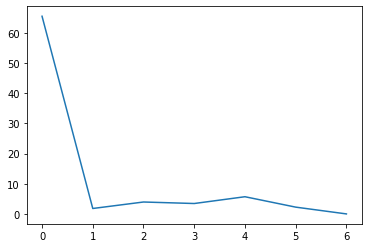

In [189]:
ax_q=sbn.lineplot(x=T, y=q_final)

[Text(0.5, 0, 'time'), Text(0, 0.5, 'q_final')]

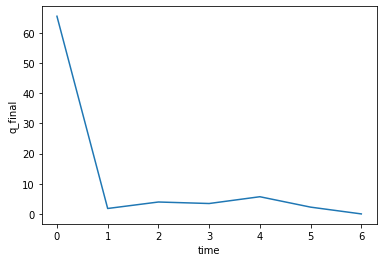

In [199]:
ax_q=sbn.lineplot(x=T, y=q_final)
ax_q.set(xlabel='time', ylabel='q_final')

[Text(0.5, 0, 'time'), Text(0, 0.5, 'x_final')]

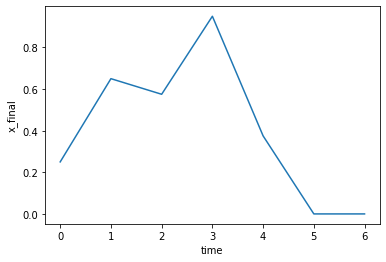

In [200]:
ax_x=sbn.lineplot(x=T, y=x_final)
ax_x.set(xlabel='time', ylabel='x_final')

[Text(0.5, 0, 'time'), Text(0, 0.5, 'y_final')]

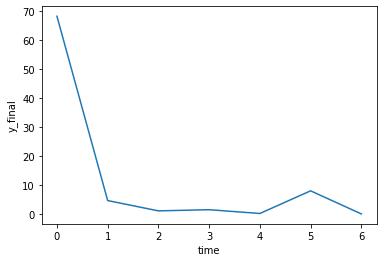

In [201]:
ax_y=sbn.lineplot(x=T, y=y_final)
ax_y.set(xlabel='time', ylabel='y_final')

[Text(0.5, 0, 'time'), Text(0, 0.5, 'e_final')]

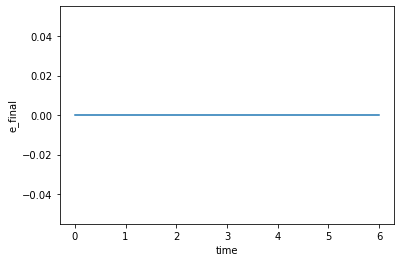

In [202]:
ax_e=sbn.lineplot(x=T, y=e_final)
ax_e.set(xlabel='time', ylabel='e_final')

[Text(0.5, 0, 'time'), Text(0, 0.5, 'p_final')]

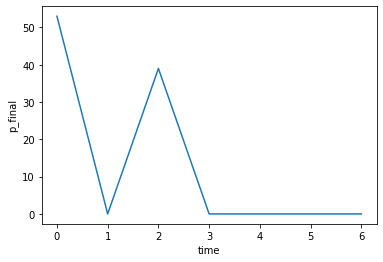

In [203]:
ax_p=sbn.lineplot(x=T, y=p_final)
ax_p.set(xlabel='time', ylabel='p_final')


# ax_q.set(xlabel='time', ylabel='q_final')
# ax_x.set(xlabel='time', ylabel='x_final')
# ax_y.set(xlabel='time', ylabel='y_final')
# ax_e.set(xlabel='time', ylabel='e_final')
# ax_p.set(xlabel='time', ylabel='p_final')

# Extension

In [1]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import seaborn as sbn

## set definitions
# collection alternatives
K = [0,1,2,3,4]
#products required
J = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
#planning horizon
T = [0,1,2,3,4,5,6]
#blood groups
I = [0,1,2,3,4,5,6,7]
#shelf life alternatives
S = [0,1,2,3,4,5]
#set of platlets
P = [0,1]

values = [[53, 81.10923163412492, 26.388446364308283, 43.299213384643515], [128, 70.70804598078107, 3.460460027118386, 55.95425411945416], [113, 95.22121141909994, 82.86139883852162, 39.8931834395421], [188, 127.25354364734929, 89.75739981905785, 27.759519000670377], [76, 72.07005687679279, 29.779994587167778, 23.48169383860372], [108, 148.10187291811576, 64.08244288309393, 63.39531348117182], [17, 40.24949285971841, 32.0542145488337, 42.67039239220871]]

## parameter definitions


Aik = {(0, 0): 69, (0, 1): 57, (0, 2): 57, (0, 3): 27, (0, 4): 27, (1, 0): 26, (1, 1): 21, (1, 2): 21, (1, 3): 10, (1, 4): 10, (2, 0): 9, (2, 1): 7, (2, 2): 7, (2, 3): 3, (2, 4): 3, (3, 0): 4, (3, 1): 3, (3, 2): 3, (3, 3): 2, (3, 4): 2, (4, 0): 2, (4, 1): 2, (4, 2): 2,(4, 3): 1, (4, 4): 1, (5, 0): 1, (5, 1): 1, (5, 2): 1, (5, 3): 1, (5, 4): 1, (6, 0): 1, (6, 1): 1, (6, 2): 1, (6, 3): 1, (6, 4): 1, (7, 0): 1, (7, 1): 1, (7, 2): 1, (7, 3): 1, (7, 4): 1}
#random normal w std dev, mean based on table 8 print({(18, t): np.random.normal(250, 60) for j in J for t in T })
Bjt = {(0, 0): 145.539510834704, (0, 1): 41.569851825117816, (0, 2): 18.10208550380641, (0, 3): 9.457866520391093, (0, 4): 3.2819290279378537, (0, 5): 2.0912656866924024, (0, 6): 1.149762757898514, (1, 0): 133.11575492646176, (1, 1): 33.340771181290656, (1, 2): 16.719467816534205, (1, 3): 10.138069546513421, (1, 4): 4.871066299854871, (1, 5): 2.556673302242767, (1, 6): 1.3360698435790286, (2, 0): 100.59471556453113, (2, 1): 49.44702483690663, (2, 2): 15.09214320178617, (2, 3): 7.546200468722795, (2, 4): 3.9502535969645454, (2, 5): 3.2797345215874474, (2, 6): 1.309042167649474, (3, 0): 169.39632937258963, (3, 1): 38.22640056461492, (3, 2): 14.397135377763451, (3, 3): 7.221238666035868, (3, 4): 3.7783411204800688, (3, 5): 2.6283316019688914, (3, 6): 0.9213093046544089, (4, 0): 160.14008916111206, (4, 1): 60.70988702650646, (4, 2): 16.480632228244765, (4, 3): 7.091131703199041, (4, 4): 3.0467184438156174, (4, 5): 3.3409486043570054, (4, 6): 0.933795830775099, (5, 0): 117.19526585682594, (5, 1): 41.440443783441154, (5, 2): 12.381740832841652, (5, 3): 8.536623196334883, (5, 4): 4.976894427358756, (5, 5): 2.5253809837364445, (5, 6): 1.0476916133358773, (6, 0): 125.65614323452598, (6, 1): 45.45957289431048, (6, 2): 12.698623984253091, (6, 3): 8.576627569873228, (6, 4): 2.1115741036367925, (6, 5): 2.8912559030285694, (6, 6): 1.0564842022885819, (7, 0): 126.82147191458222, (7, 1): 31.057393492613265, (7, 2): 8.71479274798838, (7, 3): 8.236987148918393, (7, 4): 4.4657547979455225, (7, 5): 4.154988290507172, (7, 6): 0.7670378553432176, (8, 0): 66.23407772255902, (8, 1): 24.514520242762227, (8, 2): 16.232101562401443, (8, 3): 8.181877438429792, (8, 4): 3.3986962211108156, (8, 5): 3.033663125845519, (8, 6): 1.0506602774041423, (9, 0): 158.43727172947376, (9, 1): 42.471644327143494, (9, 2): 16.888683152667735, (9, 3): 6.340495211581727, (9, 4): 3.1923264128367808, (9, 5): 3.11128736089802, (9, 6): 1.2394252614873817, (10, 0): 163.1603161551882, (10, 1): 59.883661253398905, (10, 2): 15.66202140227786, (10, 3): 7.97233459078031, (10, 4): 2.0085685864110507, (10, 5): 3.729333905622006, (10, 6): 1.4021800068294927, (11, 0): 155.2749227820726, (11, 1): 51.6467317652742, (11, 2): 21.114002663988103, (11, 3): 11.465241492274867, (11, 4): 2.4610551710607167, (11, 5): 3.6697702062636632, (11, 6): 1.0491401024744804, (12, 0): 92.57107291723524, (12, 1): 37.20368418208364, (12, 2): 14.51276757476296, (12, 3): 3.201502343431344, (12, 4): 3.9202494483673966, (12, 5): 3.2959740291967337, (12, 6): 0.7852466351477012, (13, 0): 115.72665237438396, (13, 1): 57.682967806062834, (13, 2): 16.986069626155377, (13, 3): 10.504191558250303, (13, 4): 2.2634537723137673, (13, 5): 2.5231902728526703, (13, 6): 1.3248132014767229, (14, 0): 128.2369196417541, (14, 1): 74.21319230518888, (14, 2): 15.787761483144518, (14, 3): 11.868265181779893, (14, 4): 4.076878134952529, (14, 5): 1.6230188004102633, (14, 6): 1.1265129844743897, (15, 0): 131.19748663966527, (15, 1): 53.66794898748032, (15, 2): 20.224589892534674, (15, 3): 6.912826664497755, (15, 4): 4.746783442970239, (15, 5): 3.841031243181387, (15, 6): 1.1984055526805373, (16, 0): 175.27763366134218, (16, 1): 154.03646910333725, (16, 2): 178.07927363545653, (16, 3): 157.48175167216613, (16, 4): 120.18993926712284, (16, 5): 134.75081308561948, (16, 6): 109.13965396324679, (17, 0): 121.52809036608187, (17, 1): 159.80184991110178, (17, 2): 183.93468068162903, (17, 3): 147.52019968956225, (17, 4): 148.61291939072825, (17, 5): 166.27916085360937, (17, 6): 160.15929866179252, (18, 0): 345.48479072329076, (18, 1): 212.5579670816855, (18, 2): 200.6267660115838, (18, 3): 267.06572866450847, (18, 4): 157.98527428051483, (18, 5): 323.4640615708025, (18, 6): 279.96487395270725, (19, 0): 50, (19, 1): 50, (19, 2): 50, (19, 3): 50, (19, 4): 50, (19, 5): 50, (19, 6): 50}
Bjt = {i: round(Bjt[i]/2) for i in Bjt}

Cikj = {(0, 0, 0): 1,(0, 0, 8): 1,(0, 1, 0): 1,(0, 1, 8): 1,(0, 2, 0): 1,(0, 2, 8): 1,(0, 3, 0): 2,(0, 3, 8): 2, (1, 0, 1): 1,(1, 0, 9): 1,(1, 1, 1): 1,(1, 1, 9): 1,(1, 2, 1): 1,(1, 2, 9): 1, (1, 3, 1): 2,(1, 3, 9): 2, (2, 0, 2): 1,(2, 0, 10): 1,(2, 1, 2): 1,(2, 1, 10): 1,(2, 2, 2): 1,(2, 2, 10): 1, (2, 3, 2): 2,(2, 3, 10): 2, (3, 0, 3): 1,(3, 0, 11): 1,(3, 1, 3): 1,(3, 1, 11): 1,(3, 2, 3): 1,(3, 2, 11): 1,(3, 3, 3): 2,(3, 3, 11): 2, (4, 0, 4): 1,(4, 0, 12): 1,(4, 1, 4): 1,(4, 1, 12): 1,(4, 2, 4): 1,(4, 2, 12): 1,(4, 3, 4): 2,(4, 3, 12): 2, (5, 0, 5): 1,(5, 0, 13): 1,(5, 1, 5): 1,(5, 1, 13): 1,(5, 2, 5): 1,(5, 2, 13): 1,(5, 3, 5): 2,(5, 3, 13): 2,(6, 0, 6): 1,(6, 0, 14): 1,(6, 1, 6): 1,(6, 1, 14): 1,(6, 2, 6): 1,(6, 2, 14): 1,(6, 3, 6): 2,(6, 3, 14): 2,(7, 0, 7): 1,(7, 0, 15): 1,(7, 1, 7): 1,(7, 1, 15): 1,(7, 2, 7): 1,(7, 2, 15): 1,(7, 3, 15): 2,(7, 3, 15): 2, (0, 0, 18): 1, (1, 0, 18): 1, (2, 0, 18): 1, (3, 0, 18): 1, (4, 0, 18): 1, (5, 0, 18): 1, (6, 0, 18): 1, (7, 0, 18): 1, (0, 1, 18): 1, (1, 1, 18): 1, (2, 1, 18): 1, (3, 1, 18): 1, (4, 1, 18): 1, (5, 1, 18): 1, (6, 1, 18): 1, (7, 1, 18): 1, (0, 1, 16): 1, (1, 1, 16): 1, (2, 1, 16): 1, (3, 1, 16): 1, (4, 1, 16): 1, (5, 1, 16): 1, (6, 1, 16): 1, (7, 1, 16): 1, (0, 1, 17): 1, (1, 1, 17): 1, (2, 1, 17): 1, (3, 1, 17): 1, (4, 1, 17): 1, (5, 1, 17): 1, (6, 1, 17): 1, (7, 1, 17): 1, (0, 3, 17): 1, (1, 4, 17): 1, (2, 4, 17): 1, (3, 4, 17): 1, (4, 4, 17): 1, (5, 4, 17): 1, (6, 4, 17): 1, (7, 4, 17): 1, (0, 2, 19): 1, (1, 2, 19): 1, (2, 2, 19): 1, (3, 2, 19): 1, (4, 2, 19): 1, (5, 2, 19): 1, (6, 2, 19): 1, (7, 2, 19): 1}


def get_Cikj(group,process,product):
    if (group,process,product) in Cikj:
        return Cikj[group,process,product]
    else:
        return 0

Di = {
    0 : 0.609,
    1 : 0.23,
    2 : 0.0792,
    3 : 0.0422,
    4 : 0.0172,
    5 : 0.0154,
    6 : 0.0051,
    7 : 0.0011
}

Ek = {
    0 : 20,
    1 : 25,
    2 : 25,
    3 : 65,
    4 : 150
}


F, G, H, = 150,55,35
L,Q,V,W,Z = 1000,1000,200,1400,450

Lj = {0: 700, 1: 700, 2: 700, 3: 700, 4: 700, 5: 700, 6: 700, 7: 700, 8: 700, 9: 700, 10: 700, 11: 700, 12: 700, 13: 700, 14: 700, 15: 700, 16: 1000, 17: 10000, 18: 1400, 19: 1600}

alpha_j = {0: 0.049725, 1: 0.049725, 2: 0.049725, 3: 0.049725, 4: 0.049725, 5: 0.049725, 
           6: 0.049725, 7: 0.049725, 8: 0.049725, 9: 0.049725, 10: 0.049725, 11: 0.049725, 
          12: 0.049725, 13: 0.049725, 14: 0.049725, 15: 0.049725, 16: 0.0434, 17: 0.0434, 18: 0, 19: 0}

Mj ={0: 100, 1: 40, 2: 25, 3: 18, 4: 14, 5: 14, 6: 10, 7: 10, 8: 100, 9: 40, 10: 25, 11: 18, 12: 14, 13: 14, 14: 10, 15: 0.10, 16: 60, 17: 60, 18: 150, 19: 80} 

Nj = {0: 15, 1: 10, 2: 10, 3: 10, 4: 5, 5: 5, 6: 5, 7: 15, 8: 10, 9: 10, 10: 10, 11: 5, 12: 5, 13: 5, 14: 5, 15: 5, 16: 15, 17: 10, 18: 10, 19: 10}
# Nj[0]=0
# Nj = {i: Nj[i]*1e10 for i in Nj}

#generated through prob dist, different eaach time - MAKE VARIABLE
Ot ={
    0 : 0.07759882869692533,
    1 : 0.18740849194729137,
    2 : 0.16544655929721816,
    3 : 0.2752562225475842,
    4 : 0.11127379209370425,
    5 : 0.1581259150805271,
    6 : 0.024890190336749635
}

Rt = {    
    0 : 1,
    1 : 1,
    2 : 1,
    3 : 1,
    4 : 1,
    5 : 1,
    6 : 1
    }

Xps = {(0, 0): 7, (0, 1): 14, (0, 2): 21, (0, 3): 28, (0, 4): 35, (0, 5): 42, (1, 0): 7, (1, 1): 14, (1, 2): 21, (1, 3): 28, (1, 4): 35, (1, 5): 42}



model = gp.Model('version1')

## NOTE: every variable is integer+ except for slack and surplus (default is continuous)

## decision variables
dv_x=model.addVars(I, K, T, name='x_ikt', vtype=GRB.INTEGER)

## auxiliary variables
av_q=model.addVars(J, T, name='q_jt', vtype=GRB.INTEGER)
av_i=model.addVars(J, T, name='i_jt', vtype=GRB.INTEGER)
av_y=model.addVars(J, T, name='y_jt', vtype=GRB.INTEGER)
av_sl=model.addVars(I, T, name='sl_it')
av_spl=model.addVars(I,T, name='spl_it')

av_p=model.addVars(P, T, name='p_pt', vtype=GRB.INTEGER)
av_r=model.addVars(P, S, T, name='r_pst', vtype=GRB.INTEGER)
av_u=model.addVars(P, S, T, name='u_pst', vtype=GRB.INTEGER)
av_e = model.addVars(P,T, name='e_pt', vtype=GRB.INTEGER)


## objective functionv (minimization)
obj_W = sum([
    sum([Ek[k]*dv_x.sum('*',k,'*') for k in K]),
    Q*av_e.sum('*', '*'),
    sum([Lj[j]*av_y.sum(j, '*') for j in J]),
    Z*av_spl.sum('*', '*'),
])

model.setObjective(obj_W, GRB.MINIMIZE)


# note constraint labelling starts from 2 (first contstraint is 2)
#model.addConstrs((), "(15)")
# constraints (2)
model.addConstrs( (
    sum([dv_x.sum('*', k, t) for k in {0,1,2} ]) <= F*Rt[t] 
    for t in T 
    ), "(2)a")
model.addConstrs( (
    dv_x.sum(i, K[3], t) <= G*Rt[t] 
    for i in I for t in T 
    ), "(2)b")
model.addConstrs( (
    dv_x.sum(i, K[4], t) <= H*Rt[t] 
    for i in I for t in T 
    ), "(2)c")

#constraint (3)
model.addConstrs( (
    av_q[j, 0] == sum([sum([Aik[i,k]*get_Cikj(i,k,j) for i in I]) for k in K]) 
    for j in J 
    ), "(3)")

# constraint (4) -- why Aik? should be dv_x(i, k, t-1)
model.addConstrs( (
    av_q[j, t] == sum([sum([dv_x[i,k,t-1]*get_Cikj(i,k,j) for i in I]) for k in K]) 
    for j in J for t in T if t >=1 
    ), "(4)")

# constraint (5), (6) -- these should be == constraints 
model.addConstrs((
    (av_i[j,0] - av_y[j,0]) == (Nj[j] - Bjt[j,0]) 
    for j in J if j not in {16,17} 
    ), "(5)")
model.addConstrs((
    av_i[j,t] == (av_i[j,t-1] + av_q[j,t-1] + av_y[j,t] - Bjt[j,t]) 
    for t in T for j in J if (j not in {16,17} and t >= 1) 
    ), "(6)")

# constraint (7)-(12) -- these should be == constraints 
model.addConstrs((
    av_e[p,0] == (Xps[p,0] - av_u[p,0,0]) 
    for p in P 
    ), "(7)")
model.addConstrs((
    av_r[p,s-1,0] == (Xps[p,s] - av_u[p,s,0]) 
    for p in P for s in S if s > 0
    ), "(8)")
model.addConstrs((
    av_e[p,t] == (av_r[p,0,t]-av_u[p,0,t]) 
    for p in P for t in T if t > 0
    ), "(9)")
model.addConstrs((
    av_r[p,s-1,t] == (av_r[p,s,t-1] - av_u[p,s,t]) 
    for p in P for s in S for t in T if (t > 0 and (s not in {0,4}))
    ), "(10)")
model.addConstrs((
    av_r[0,3,t] == (av_r[0,4,t-1] + av_q[16,t-1] - av_u[0,4,t]) 
    for t in T if t > 0 
    ), "(11)")
model.addConstrs((
    av_r[1,3,t] == (av_r[1,4,t-1] + av_q[17, t-1] - av_u[1,4,t]) 
    for t in T if t > 0
    ), "(12)")

# # constraint (13), (14) -- these should be == constraints 
model.addConstrs((
    av_u.sum(0, '*', t) == Bjt[16, t] 
    for t in T
    ), "(13)")
model.addConstrs((
    (av_u.sum(1, '*', t) - av_p[1,t]) == Bjt[17,t] 
    for t in T 
    ), "(14)")

# constraint (15) - (18)
model.addConstrs((
    (dv_x.sum(i,'*', t) - Di[i]*dv_x.sum('*','*',t) + av_sl[i,t] - av_spl[i,t] ) == 0 
    for i in I for t in T 
    ), "(15)")
# 16,17 should be <=
model.addConstrs((
    dv_x.sum(i, '*', t) <= Di[i]*V 
    for i in I for t in T
    ), "(16)")
model.addConstrs((
    dv_x.sum('*', '*', t) <= W*Ot[t] 
    for t in T
    ), "(17)")
model.addConstrs((
    av_i[j,t] >= Mj[j] 
    for j in J for t in T
    ), "(18)")

model.optimize()
# try:
#     model.computeIIS()
# except:
#     print("FEASIBLE")

for v in model.getVars():
#     print(dir(v))
    print('%s %g' % (v.varName, v.x))


Academic license - for non-commercial use only
Optimize a model with 742 rows, 1008 columns and 4949 nonzeros
Variable types: 112 continuous, 896 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e-03, 2e+00]
  Objective range  [2e+01, 1e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 4e+02]
Found heuristic solution: objective 2819700.0000
Presolve removed 615 rows and 794 columns
Presolve time: 0.01s
Presolved: 127 rows, 214 columns, 1489 nonzeros
Variable types: 30 continuous, 184 integer (18 binary)

Root relaxation: objective 1.722532e+06, 216 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1722531.66    0   66 2819700.00 1722531.66  38.9%     -    0s
H    0     0                    1748047.2350 1722531.66  1.46%     -    0s
H    0     0                    1727225.8200 1722531.66  0.27%     -    0s
     0     0

spl_it[2,6] 0
spl_it[3,0] 1.4424
spl_it[3,1] 0
spl_it[3,2] 0
spl_it[3,3] 0.1342
spl_it[3,4] 0.2992
spl_it[3,5] 0
spl_it[3,6] 0
spl_it[4,0] 1.1424
spl_it[4,1] 0.3684
spl_it[4,2] 0
spl_it[4,3] 0
spl_it[4,4] 0
spl_it[4,5] 0
spl_it[4,6] 0
spl_it[5,0] 1.3368
spl_it[5,1] 0.6438
spl_it[5,2] 0.0596
spl_it[5,3] 0
spl_it[5,4] 0.0144
spl_it[5,5] 0
spl_it[5,6] 0
spl_it[6,0] 0.4492
spl_it[6,1] 0.2197
spl_it[6,2] 0.3574
spl_it[6,3] 0.2911
spl_it[6,4] 0
spl_it[6,5] 0
spl_it[6,6] 0
spl_it[7,0] 0
spl_it[7,1] 0
spl_it[7,2] 0
spl_it[7,3] 0
spl_it[7,4] 0
spl_it[7,5] 0
spl_it[7,6] 0
p_pt[0,0] 0
p_pt[0,1] 0
p_pt[0,2] 0
p_pt[0,3] 0
p_pt[0,4] 0
p_pt[0,5] 0
p_pt[0,6] 0
p_pt[1,0] 86
p_pt[1,1] 0
p_pt[1,2] 47
p_pt[1,3] 0
p_pt[1,4] 0
p_pt[1,5] 0
p_pt[1,6] 0
r_pst[0,0,0] 14
r_pst[0,0,1] 17
r_pst[0,0,2] 0
r_pst[0,0,3] 0
r_pst[0,0,4] 60
r_pst[0,0,5] 0
r_pst[0,0,6] 0
r_pst[0,1,0] 17
r_pst[0,1,1] 1
r_pst[0,1,2] 0
r_pst[0,1,3] 60
r_pst[0,1,4] 0
r_pst[0,1,5] 0
r_pst[0,1,6] 0
r_pst[0,2,0] 28
r_pst[0,2,1] 0
r_pst[0,2,2] 60